# 多重网格原理

以下是使用中心差分和Gauss-Seidel迭代求解边值问题 
$$ 
-\Delta u = 0 ,
$$
其中 $ x \in [0, 1] $ 且边界条件为: $ u(0) = u(1) = 0 $. 
显然, 这个问题的真解是 $u = 0$. 我们用中心差商来离散这个问题, 
$$
u''(x_i) \approx \frac{u_{i-1} - 2u_i + u_{i+1}}{h^2}, 
$$
$i = 0, 1, \cdots, N$, $x_0 = 0$, $x_1 = 1$, $h = 1 / N$.

我们取迭代初值为 
$$
u = \sin(\pi x),
$$
则 $h$ 不但影响问题的求解精度, 也影响了计算的规模. 

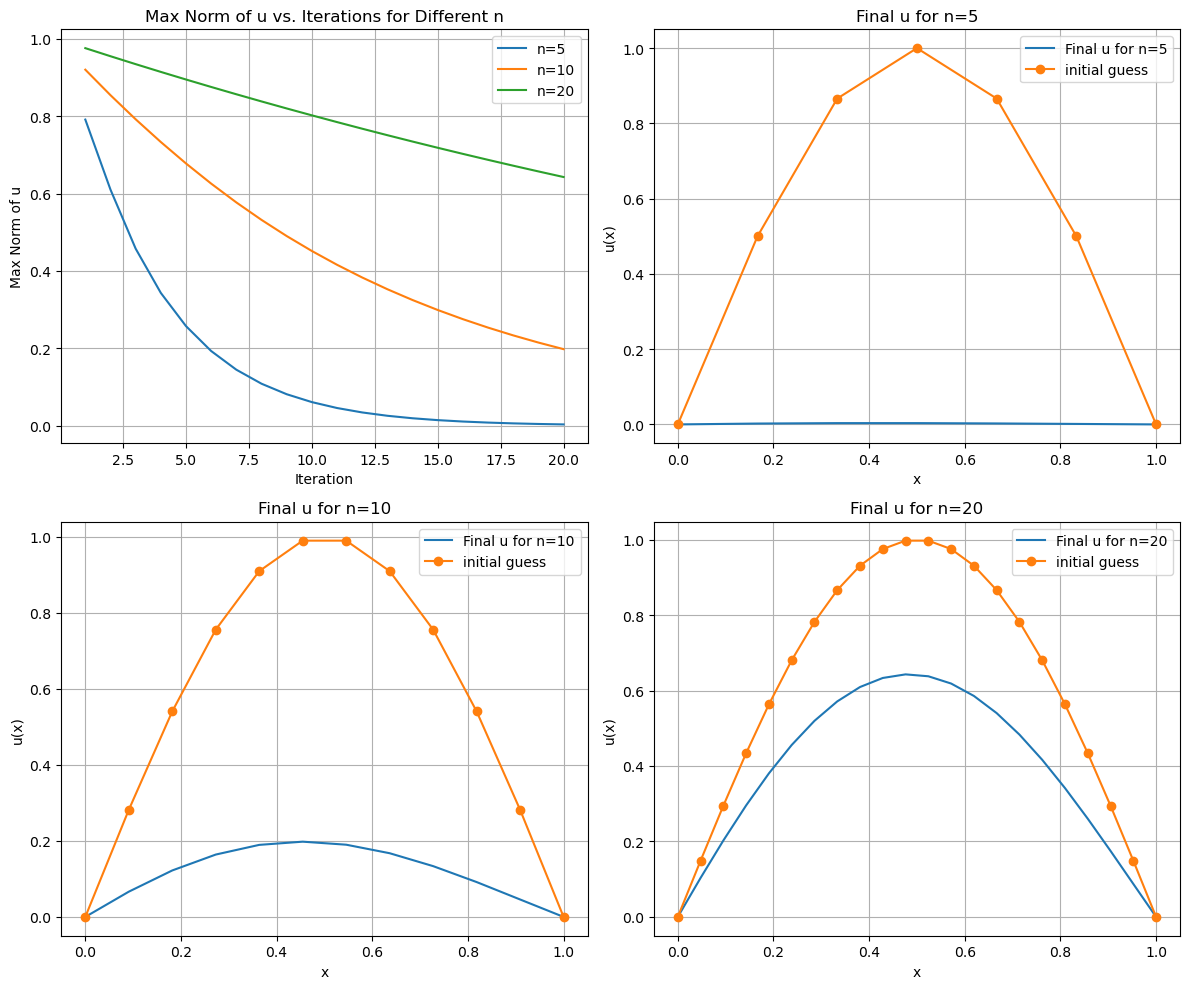

In [11]:
import numpy as np
from matplotlib import pyplot as plt

# Define the modified Gauss-Seidel function to track L2 norm of u
def gauss_seidel_with_norm(u, n, tol, max_iter):
    norms = []  # List to hold L2 norms of u for each iteration

    for iteration in range(max_iter):
        u_old = u.copy()

        # Update the interior points
        for i in range(1, n+1):
            u[i] = 0.5 * (u[i-1] + u[i+1])  # Central difference approximation

        # Calculate and store the L2 norm for this iteration
        norm = np.abs(np.max(u)) #np.linalg.norm(u, 2) / np.sqrt(n)
        norms.append(norm)

        # Check for convergence
        #if np.max(np.abs(u_old - u)) < tol:
        #    break

    return u, iteration, norms

# Define parameters
n_values = [5, 10, 20]
tol = 1e-15  # tolerance for stopping criterion
max_iter = 20  # maximum number of iterations
initial_func = lambda x: np.sin(np.pi * x)  # Initial function u = sin(pi*x)

# Modify the function for plotting subplots including the final u values
plt.figure(figsize=(12, 10))

# Plotting for norms
plt.subplot(2, 2, 1)
for n in n_values:
    x = np.linspace(0, 1, n+2)  # grid points including boundary
    u = initial_func(x)  # initial guess
    u_final, iterations, norms = gauss_seidel_with_norm(u, n, tol, max_iter)
    plt.plot(range(1, iterations+2), norms, label=f"n={n}")
plt.title("Max Norm of u vs. Iterations for Different n")
plt.xlabel("Iteration")
plt.ylabel("Max Norm of u")
plt.legend()
plt.grid(True)

# Plotting for final u values for different n
for index, n in enumerate(n_values, start=2):
    x = np.linspace(0, 1, n+2)
    u = initial_func(x)
    u_final, iterations, norms = gauss_seidel_with_norm(u, n, tol, max_iter)
    plt.subplot(2, 2, index)
    plt.plot(x, u_final, label=f"Final u for n={n}")
    plt.plot(x, initial_func(x), 'o-', label=f"initial guess")
    plt.title(f"Final u for n={n}")
    plt.xlabel("x")
    plt.ylabel("u(x)")
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

我们可以看到, 似乎越密的网格, 残量越大, 因此收敛的越慢. 但真的就是这样么? 如果我们把初始误差(初值)改成高频震荡的函数又会如何? 比如:
$$
u = \sin(20 \pi x).
$$

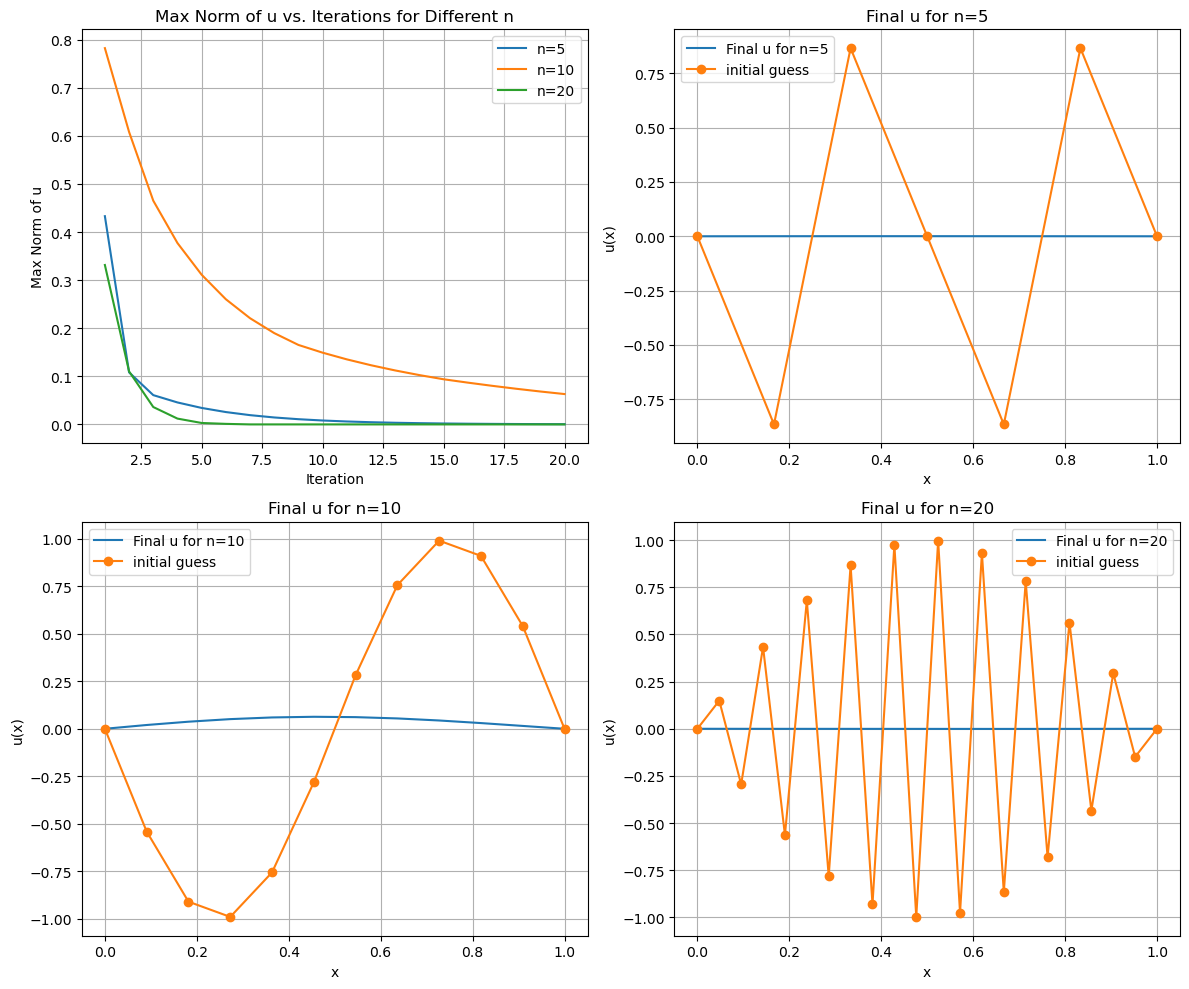

In [13]:
# Define parameters
n_values = [5, 10, 20]
tol = 1e-15  # tolerance for stopping criterion
max_iter = 20  # maximum number of iterations
initial_func = lambda x: np.sin(20 * np.pi * x)  # Initial function u = sin(pi*x)

# Modify the function for plotting subplots including the final u values
plt.figure(figsize=(12, 10))

# Plotting for norms
plt.subplot(2, 2, 1)
for n in n_values:
    x = np.linspace(0, 1, n+2)  # grid points including boundary
    u = initial_func(x)  # initial guess
    u_final, iterations, norms = gauss_seidel_with_norm(u, n, tol, max_iter)
    plt.plot(range(1, iterations+2), norms, label=f"n={n}")
plt.title("Max Norm of u vs. Iterations for Different n")
plt.xlabel("Iteration")
plt.ylabel("Max Norm of u")
plt.legend()
plt.grid(True)

# Plotting for final u values for different n
for index, n in enumerate(n_values, start=2):
    x = np.linspace(0, 1, n+2)
    u = initial_func(x)
    u_final, iterations, norms = gauss_seidel_with_norm(u, n, tol, max_iter)
    plt.subplot(2, 2, index)
    plt.plot(x, u_final, label=f"Final u for n={n}")
    plt.plot(x, initial_func(x), 'o-',label=f"initial guess")
    plt.title(f"Final u for n={n}")
    plt.xlabel("x")
    plt.ylabel("u(x)")
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

有趣的事情发生了, 我们可以看到, 并不是节点越多, 收敛的越慢. 事实上, 我们观察到收敛的最快的是和振荡频率一致的网格. 那么如果一个函数既有高频又有低频呢?

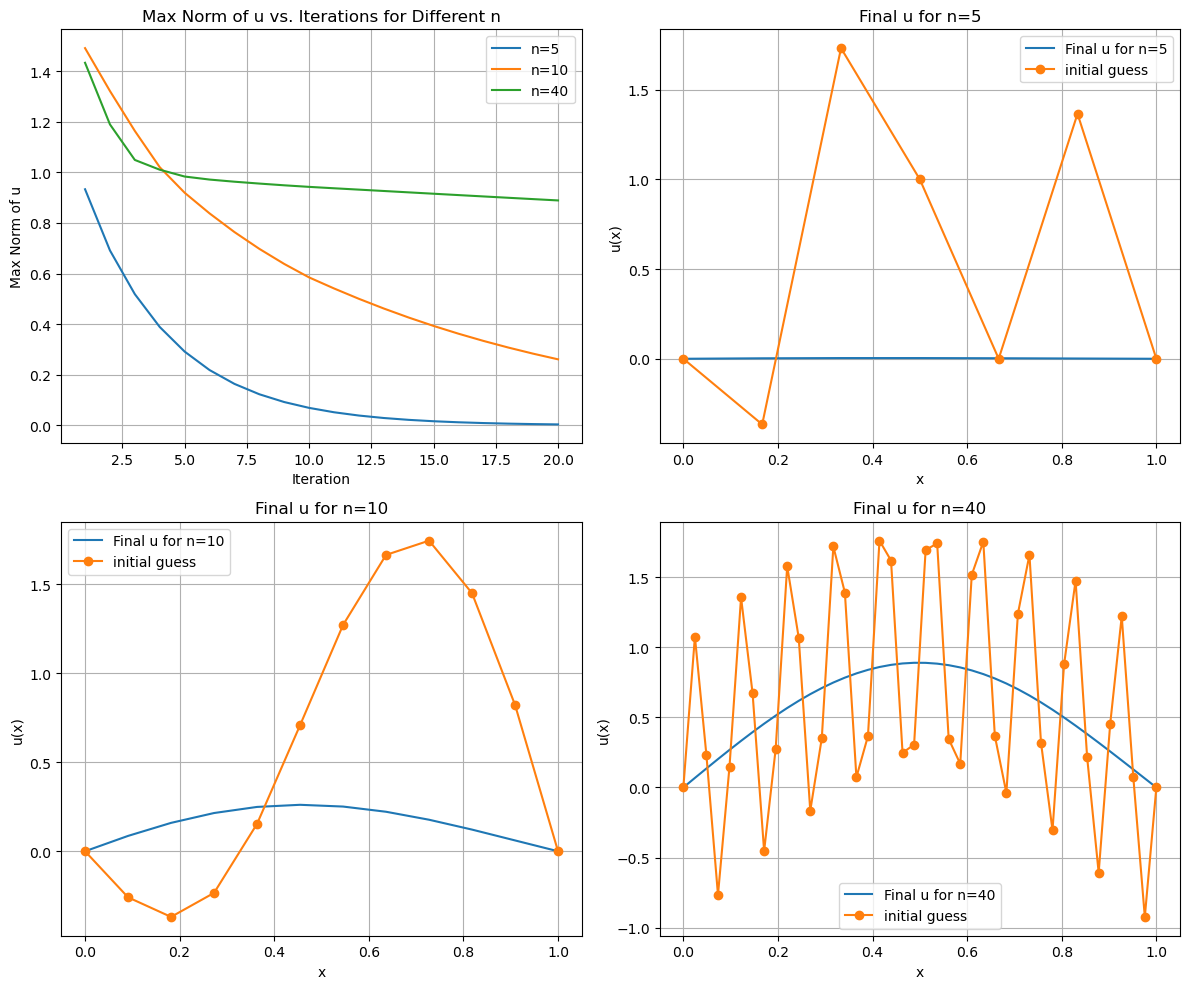

In [14]:
# Define parameters
n_values = [5, 10, 40]
tol = 1e-15  # tolerance for stopping criterion
max_iter = 20  # maximum number of iterations
initial_func = lambda x: np.sin(np.pi * x) + np.sin(20 * np.pi * x)  # Initial function u = sin(pi*x)

# Modify the function for plotting subplots including the final u values
plt.figure(figsize=(12, 10))

# Plotting for norms
plt.subplot(2, 2, 1)
for n in n_values:
    x = np.linspace(0, 1, n+2)  # grid points including boundary
    u = initial_func(x)  # initial guess
    u_final, iterations, norms = gauss_seidel_with_norm(u, n, tol, max_iter)
    plt.plot(range(1, iterations+2), norms, label=f"n={n}")
plt.title("Max Norm of u vs. Iterations for Different n")
plt.xlabel("Iteration")
plt.ylabel("Max Norm of u")
plt.legend()
plt.grid(True)

# Plotting for final u values for different n
for index, n in enumerate(n_values, start=2):
    x = np.linspace(0, 1, n+2)
    u = initial_func(x)
    u_final, iterations, norms = gauss_seidel_with_norm(u, n, tol, max_iter)
    plt.subplot(2, 2, index)
    plt.plot(x, u_final, label=f"Final u for n={n}")
    plt.plot(x, initial_func(x), 'o-',label=f"initial guess")
    plt.title(f"Final u for n={n}")
    plt.xlabel("x")
    plt.ylabel("u(x)")
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

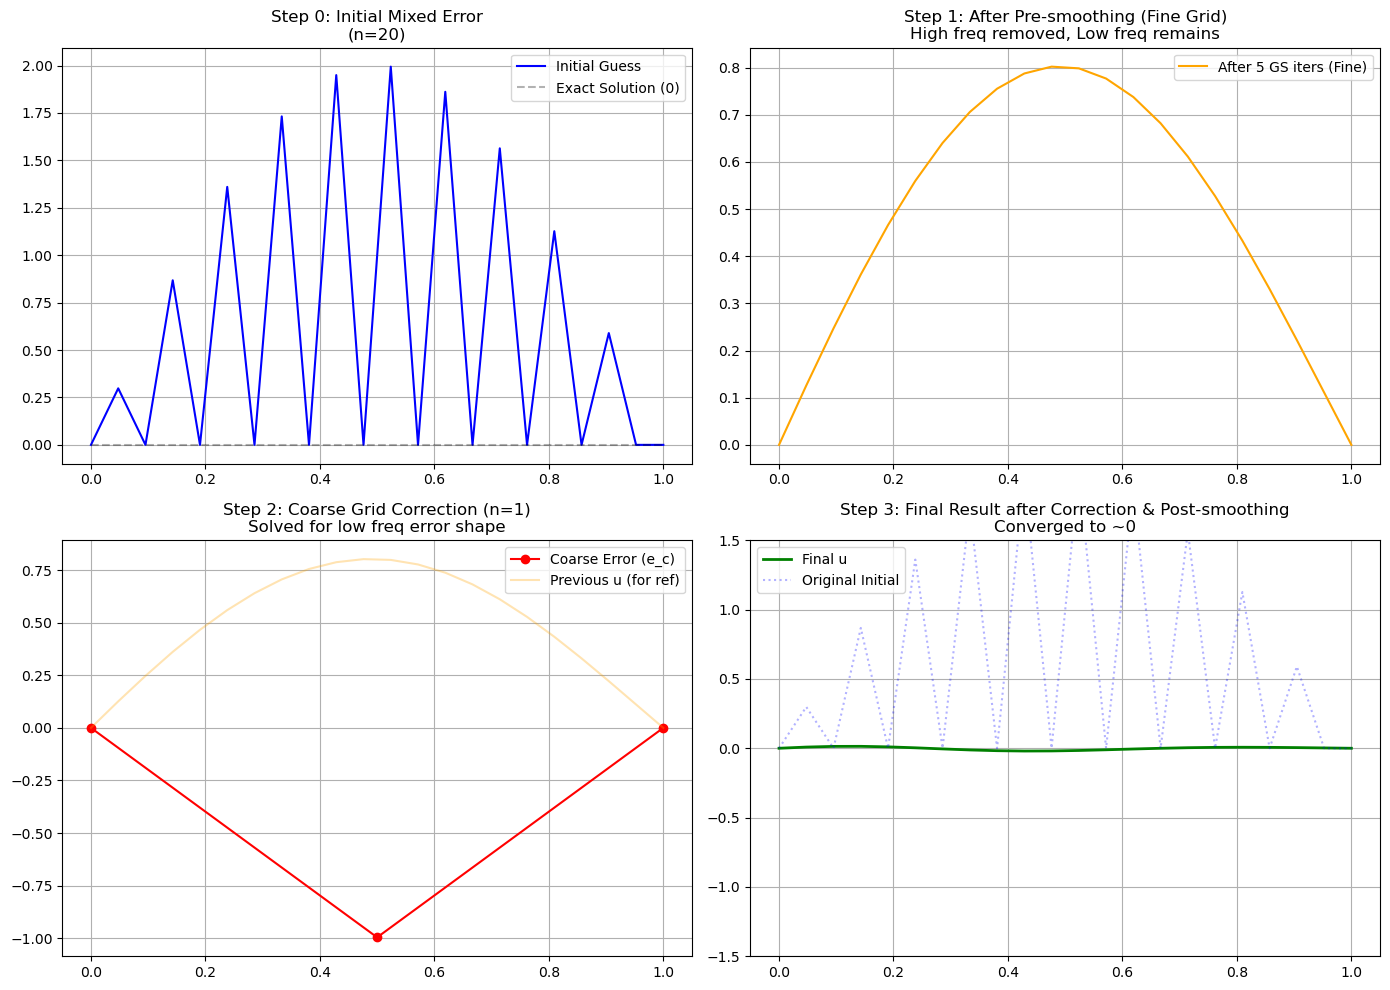

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# ==========================================
# 1. 定义基础数值方法 (Gauss-Seidel & 辅助函数)
# ==========================================

def gauss_seidel_step(u, f, h):
    """
    执行一次 Gauss-Seidel 迭代: -u'' = f
    边界条件 u[0] = u[-1] = 0
    """
    n = len(u) - 2
    u_new = u.copy()
    # 离散化方程: (2u_i - u_{i-1} - u_{i+1})/h^2 = f_i
    # 迭代公式: u_i = 0.5 * (u_{i-1} + u_{i+1} + h^2 * f_i)
    for i in range(1, n + 1):
        u_new[i] = 0.5 * (u_new[i-1] + u_new[i+1] + (h**2) * f[i])
    return u_new

def compute_residual(u, f, h):
    """计算残差 r = f - Au"""
    n = len(u) - 2
    r = np.zeros_like(u)
    # A u = (-u_{i-1} + 2u_i - u_{i+1}) / h^2
    for i in range(1, n + 1):
        Au_i = (-u[i-1] + 2*u[i] - u[i+1]) / (h**2)
        r[i] = f[i] - Au_i
    return r

def restrict(r_fine, x_fine, x_coarse):
    """限制算子：将细网格残差插值到粗网格 (Restriction)"""
    # 使用线性插值模拟限制算子
    interp_func = interp1d(x_fine, r_fine, kind='linear')
    return interp_func(x_coarse)

def prolongate(e_coarse, x_coarse, x_fine):
    """延拓算子：将粗网格误差插值回细网格 (Prolongation)"""
    interp_func = interp1d(x_coarse, e_coarse, kind='linear')
    return interp_func(x_fine)

# ==========================================
# 2. 参数设置与初始化
# ==========================================

# 网格设置
n_fine = 20
n_coarse = 1

# 细网格坐标
x_fine = np.linspace(0, 1, n_fine + 2)
h_fine = 1.0 / (n_fine + 1)

# 粗网格坐标
x_coarse = np.linspace(0, 1, n_coarse + 2)
h_coarse = 1.0 / (n_coarse + 1)

# 初始问题: -u'' = 0 (目标解为0), 初始猜测包含混合频率误差
initial_func = lambda x: np.sin(np.pi * x) + np.sin(20 * np.pi * x)
u = initial_func(x_fine)
f_fine = np.zeros_like(u) # 右端项为0

# 绘图准备
plt.figure(figsize=(14, 10))

# ==========================================
# 3. 双层网格过程演示 (Two-Grid Cycle)
# ==========================================

# --- 阶段 0: 初始状态 ---
plt.subplot(2, 2, 1)
plt.plot(x_fine, u, 'b-', label='Initial Guess')
plt.plot(x_fine, np.zeros_like(u), 'k--', alpha=0.3, label='Exact Solution (0)')
plt.title(f"Step 0: Initial Mixed Error\n(n={n_fine})")
plt.legend()
plt.grid(True)

# --- 阶段 1: 细网格预平滑 (Pre-smoothing) ---
# 在细网格上做 5 次 GS 迭代，消除高频 sin(20pi*x)
for _ in range(10):
    u = gauss_seidel_step(u, f_fine, h_fine)

plt.subplot(2, 2, 2)
plt.plot(x_fine, u, 'orange', label='After 5 GS iters (Fine)')
plt.title(f"Step 1: After Pre-smoothing (Fine Grid)\nHigh freq removed, Low freq remains")
plt.legend()
plt.grid(True)

# --- 阶段 2: 粗网格校正 (Coarse Grid Correction) ---
# A. 计算细网格残差 r_f
r_fine = compute_residual(u, f_fine, h_fine)

# B. 限制残差到粗网格 r_c
r_coarse = restrict(r_fine, x_fine, x_coarse)

# C. 在粗网格求解误差方程 A_c * e_c = r_c
# 初始误差猜测为0
e_coarse = np.zeros_like(x_coarse)
# 在粗网格上迭代多次以获得精确解 (因为n=5很小，这很快)
for _ in range(10): 
    e_coarse = gauss_seidel_step(e_coarse, r_coarse, h_coarse)

# D. 将误差延拓回细网格 e_f
e_fine = prolongate(e_coarse, x_coarse, x_fine)

# E. 修正原解 u = u + e_f
u_corrected = u + e_fine

plt.subplot(2, 2, 3)
plt.plot(x_coarse, e_coarse, 'r-o', label='Coarse Error (e_c)')
plt.plot(x_fine, u, 'orange', alpha=0.3, label='Previous u (for ref)')
plt.title(f"Step 2: Coarse Grid Correction (n={n_coarse})\nSolved for low freq error shape")
plt.legend()
plt.grid(True)

# --- 阶段 3: 细网格后平滑 (Post-smoothing) ---
# 再次在细网格上做 5 次 GS 迭代，消除插值带来的微小高频噪音
u_final = u_corrected.copy()
for _ in range(10):
    u_final = gauss_seidel_step(u_final, f_fine, h_fine)

plt.subplot(2, 2, 4)
plt.plot(x_fine, u_final, 'g-', linewidth=2, label='Final u')
plt.plot(x_fine, initial_func(x_fine), 'b:', alpha=0.3, label='Original Initial')
plt.title(f"Step 3: Final Result after Correction & Post-smoothing\nConverged to ~0")
plt.ylim(-1.5, 1.5) # 保持比例以便比较
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()